In [1]:
import matplotlib.pyplot as plt
import numpy as np

from blg_strain.hamiltonian import H_4by4, dH_4by4
from blg_strain.bands import get_bands

In [2]:
kxa = np.linspace(1.2*-4*np.pi/(3*np.sqrt(3)),1.2*4*np.pi/(3*np.sqrt(3)), 500)
kya = kxa
Kxa, Kya = np.meshgrid(kxa, kya)

In [3]:
Delta = 10
eps = 0.1,
theta=np.pi/6

H = H_4by4(Kxa, Kya, Delta=Delta, eps=eps, theta=theta)
dHx, dHy = dH_4by4(Kxa, Kya)

In [4]:
H.shape, dHx.shape, dHy.shape

((4, 4, 500, 500), (4, 4, 500, 500), (4, 4, 500, 500))

In [5]:
kxa, kya, Kxa, Kya, E, Psi = get_bands(Delta=Delta, eps=eps, theta=theta)

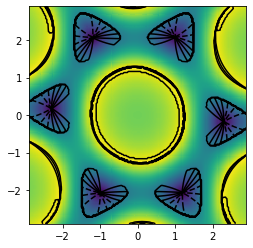

In [6]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, E[1])
ax.contour(Kxa, Kya, Psi[1][3].real, colors='k')
ax.set_aspect(1)

# Brillouin Zone

In [114]:
from blg_strain.utils.params import strain_tensor
from blg_strain.utils.const import deltans

In [115]:
%matplotlib notebook

In [116]:
strain = strain_tensor(eps, theta)
I = np.eye(2)

In [118]:
a1, a2 = deltans[2], deltans[4]  # lattice basis vectors
a1p = (I + strain).dot(a1)
a2p = (I + strain).dot(a2)

a1 = np.append(a1, 0) # make 3D
a2 = np.append(a2, 0)
a1p = np.append(a1p, 0) # make 3D
a2p = np.append(a2p, 0)

a1, a2, a1p, a2p

(array([0.8660254, 1.5      , 0.       ]),
 array([-0.8660254,  1.5      ,  0.       ]),
 array([1.00307392, 1.562625  , 0.        ]),
 array([-0.85173598,  1.47525   ,  0.        ]))

Reciprocal lattice vectors
$$
b_1 = 2\pi \frac{a_2\times \hat{z}}{|a_1\times a_2|}
$$
$$
b_2 = 2\pi \frac{\hat{z}\times a_1}{|a_1\times a_2|}
$$

In [119]:
b1 = 2 * np.pi * np.cross(a2, [0, 0, 1]) / np.linalg.norm(np.cross(a1, a2))
b2 = 2 * np.pi * np.cross([0, 0, 1], a1) / np.linalg.norm(np.cross(a1, a2))
b1p = 2 * np.pi * np.cross(a2p, [0, 0, 1]) / np.linalg.norm(np.cross(a1p, a2p))
b2p = 2 * np.pi * np.cross([0, 0, 1], a1p) / np.linalg.norm(np.cross(a1p, a2p))
b1, b2

(array([ 3.62759873,  2.0943951 , -0.        ]),
 array([-3.62759873,  2.0943951 ,  0.        ]))

In [120]:
vectors = [b1, b2]
vectorsp = [b1p, b2p]

In [121]:
import itertools
from scipy.spatial import Voronoi
from math import atan2

https://github.com/dean0x7d/pybinding/blob/master/pybinding/lattice.py

In [127]:
def get_bz_vertices(vectors):
    points = [sum(n * v for n, v in zip(ns, vectors))
                      for ns in itertools.product([-1, 0, 1], repeat=2)]
    vor = Voronoi([p[:2] for p in points])
    # See scipy's Voronoi documentation for details (-1 indicates infinity)
    finite_regions = [r for r in vor.regions if len(r) != 0 and -1 not in r]
    assert len(finite_regions) == 1
    return [vor.vertices[i] for i in finite_regions[0]]

In [128]:
bz = get_bz_vertices(vectors)
bzp = get_bz_vertices(vectorsp)

<IPython.core.display.Javascript object>


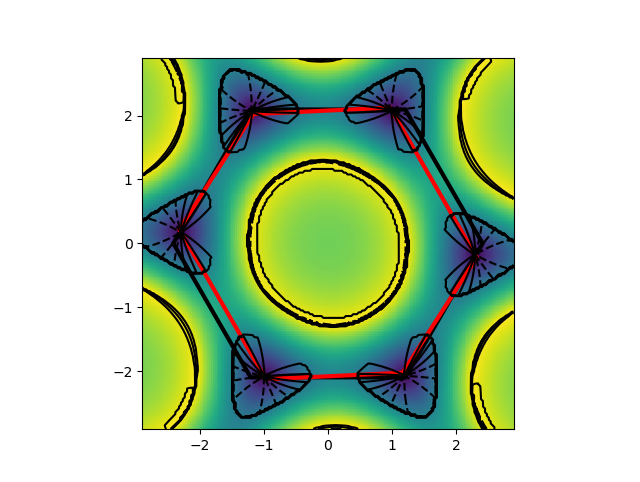

In [133]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, E[1])
ax.contour(Kxa, Kya, Psi[1][3].real, colors='k')
ax.set_aspect(1)

from matplotlib.patches import Polygon
p = Polygon(bz, fill=False, color='k', lw=3)
ax.add_patch(p)

p = Polygon(bzp, fill=False, color='r', lw=3)
ax.add_patch(p)

# ax.plot([0, b1[0]], [0, b1[1]], 'k')
# ax.plot([0, b2[0]], [0, b2[1]], 'k')

In [64]:
bz_vertices

[array([-1.20919958, -2.0943951 ]),
 array([ 1.20919958, -2.0943951 ]),
 array([2.41839915, 0.        ]),
 array([1.20919958, 2.0943951 ]),
 array([-1.20919958,  2.0943951 ]),
 array([-2.41839915,  0.        ])]

In [8]:
strain = strain_tensor(eps, theta)

In [9]:
strain

array([[0.070875  , 0.05044598],
       [0.05044598, 0.012625  ]])

## Package

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from blg_strain.utils.params import strain_tensor
from blg_strain.utils.params import brillouin_zone

In [44]:
eps = 0.1
theta = np.pi/4
# theta = 0

In [45]:
strain0 = strain_tensor(0, 0)
strain = strain_tensor(eps, theta)

bz0 = brillouin_zone(strain0)
bz = brillouin_zone(strain)

In [46]:
bz

[array([ 2.32145463, -0.26083591]),
 array([1.05891461, 2.08227924]),
 array([-1.28445145,  1.95124869]),
 array([-2.32145463,  0.26083591]),
 array([-1.05891461, -2.08227924]),
 array([ 1.28445145, -1.95124869])]

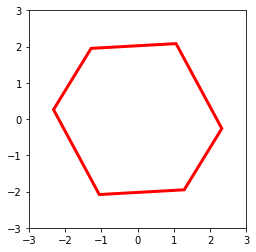

In [49]:
fig, ax = plt.subplots()

from matplotlib.patches import Polygon
# p = Polygon(bz0, fill=False, color='k', lw=3)
# ax.add_patch(p)

p = Polygon(bz, fill=False, color='r', lw=3)
ax.add_patch(p)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect(1)

Strained BZ is still a Bravais lattice. So we can still look near the distorted K and K' points to get the result over the full BZ

# Playing around with strain

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from blg_strain.utils.params import strain_tensor
from blg_strain.utils.params import brillouin_zone

In [44]:
eps = 0.1
theta = np.pi/4
# theta = 0

In [73]:
strain0 = strain_tensor(0, 0)
strain = np.array([
    [0.1, 0.2],
    [0.2, 0.2],
])

bz0 = brillouin_zone(strain0)
bz = brillouin_zone(strain)

In [74]:
bz

[array([ 2.10598815, -0.80224606]),
 array([0.96763642, 2.03530455]),
 array([-1.62213489,  1.56443704]),
 array([-2.10598815,  0.80224606]),
 array([-0.96763642, -2.03530455]),
 array([ 1.62213489, -1.56443704])]

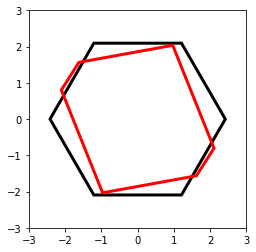

In [75]:
fig, ax = plt.subplots()

from matplotlib.patches import Polygon
p = Polygon(bz0, fill=False, color='k', lw=3)
ax.add_patch(p)

p = Polygon(bz, fill=False, color='r', lw=3)
ax.add_patch(p)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect(1)